# *Projet analyse données*

# sujet : Analyse l'imapct des indicateurs éducatifs de API word bank sur croissance économique

In [15]:
import requests
import pandas as pd
from functools import reduce
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Liste des indicateurs avec leurs codes dans l'API de la Banque mondiale
indicators = {
    'Primary Enrollment Rate': 'SE.PRM.ENRR', # Taux d'inscription à l'école primaire
    'Secondary Enrollment Rate': 'SE.SEC.ENRR', # Taux d'inscription à l'école secondaire
    'Tertiary Enrollment Rate': 'SE.TER.ENRR', # Taux d'inscription à l'enseignement supérieur
    'Completion Rate (Primary)': 'SE.PRM.CMPT.ZS', # Taux d'achèvement du cycle primaire
    'Completion Rate (Secondary)': 'SE.SEC.CMPT.LO.ZS', # Taux d'achèvement du cycle secondaire
    'Completion Rate (Tertiary)': 'SE.TER.CMPT.ZS', # Taux d'achèvement de l'enseignement supérieur
    'Public Education Expenditure (% of GDP)': 'SE.XPD.TOTL.GD.ZS',
    'Private Education Expenditure': 'SE.XPD.PRIM.PC.ZS',  # Dépenses privées en éducation
    'Expenditure per Student (Primary)': 'SE.XPD.PRIM.PC.ZS',
    'Expenditure per Student (Secondary)': 'SE.XPD.SECO.PC.ZS',
    'Expenditure per Student (Tertiary)': 'SE.XPD.TERT.PC.ZS',
    'GDP per Capita': 'NY.GDP.PCAP.CD',
    'Economic Growth Rate': 'NY.GDP.MKTP.KD.ZG',
    'Unemployment Rate': 'SL.UEM.TOTL.ZS',
    'Literacy Rate': 'SE.ADT.LITR.ZS',
    'Life Expectancy': 'SP.DYN.LE00.IN',
    'Poverty Rate': 'SI.POV.DDAY'
}

# Fonction pour récupérer les données d'un indicateur
def get_indicator_data(indicator_code):
    url = f"https://api.worldbank.org/v2/country/all/indicator/{indicator_code}?format=json&per_page=10000&date={2017}"
    response = requests.get(url)
    data = response.json()

    # Vérification de la réponse et extraction des données
    if len(data) > 1 and isinstance(data[1], list):
        df = pd.DataFrame(data[1])
        if {'country', 'countryiso3code', 'date', 'value'}.issubset(df.columns):
            df = df[['country', 'countryiso3code', 'date', 'value']].rename(
                columns={'country': 'Country', 'countryiso3code': 'Country_Code', 'date': 'Year', 'value': indicator_code}
            )
            
            # Simplification de la colonne "Country" et suppression de la colonne "Year"
            df['Country'] = df['Country'].apply(lambda x: x if isinstance(x, str) else str(x))
            df['Country_Code'] = df['Country_Code'].apply(lambda x: x if isinstance(x, str) else str(x))
            df = df.drop(columns=['Year'])  # Retirer la colonne Year, puisque vous avez fixé l'année à 2017
            return df
    print(f"No data found for {indicator_code}")
    return pd.DataFrame()

# Récupération des données pour chaque indicateur
data_frames = []
for indicator_name, indicator_code in indicators.items():
    print(f"Fetching data for {indicator_name} ({indicator_code})...")
    df = get_indicator_data(indicator_code)
    if not df.empty:
        data_frames.append(df)

# Fusion des DataFrames
def fusionner_dfs(left, right):
    return pd.merge(left, right, on=['Country', 'Country_Code'], how='outer')

if data_frames:
    # Réduire les DataFrames pour effectuer la fusion
    final_data = reduce(fusionner_dfs, data_frames)
    print("Fusion réussie.")

    # Afficher les 10 premières lignes des données
    print("Aperçu des données :")
    print(final_data.head(10))

    # Exporter les données fusionnées dans un fichier CSV
    final_data.to_csv("education_economics_indicators2017.csv", index=False)
    print("Les données ont été enregistrées dans 'education_economics_indicators.csv'")
else:
    print("Aucune donnée n'a été récupérée.")


Fetching data for Primary Enrollment Rate (SE.PRM.ENRR)...
Fetching data for Secondary Enrollment Rate (SE.SEC.ENRR)...
Fetching data for Tertiary Enrollment Rate (SE.TER.ENRR)...
Fetching data for Completion Rate (Primary) (SE.PRM.CMPT.ZS)...
Fetching data for Completion Rate (Secondary) (SE.SEC.CMPT.LO.ZS)...
Fetching data for Completion Rate (Tertiary) (SE.TER.CMPT.ZS)...
No data found for SE.TER.CMPT.ZS
Fetching data for Public Education Expenditure (% of GDP) (SE.XPD.TOTL.GD.ZS)...
Fetching data for Private Education Expenditure (SE.XPD.PRIM.PC.ZS)...
Fetching data for Expenditure per Student (Primary) (SE.XPD.PRIM.PC.ZS)...
Fetching data for Expenditure per Student (Secondary) (SE.XPD.SECO.PC.ZS)...
Fetching data for Expenditure per Student (Tertiary) (SE.XPD.TERT.PC.ZS)...
Fetching data for GDP per Capita (NY.GDP.PCAP.CD)...
Fetching data for Economic Growth Rate (NY.GDP.MKTP.KD.ZG)...
Fetching data for Unemployment Rate (SL.UEM.TOTL.ZS)...
Fetching data for Literacy Rate (SE.AD

In [17]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              266 non-null    object 
 1   Country_Code         266 non-null    object 
 2   SE.PRM.ENRR          217 non-null    float64
 3   SE.SEC.ENRR          187 non-null    float64
 4   SE.TER.ENRR          188 non-null    float64
 5   SE.PRM.CMPT.ZS       180 non-null    float64
 6   SE.SEC.CMPT.LO.ZS    181 non-null    float64
 7   SE.XPD.TOTL.GD.ZS    216 non-null    float64
 8   SE.XPD.PRIM.PC.ZS_x  39 non-null     float64
 9   SE.XPD.PRIM.PC.ZS_y  39 non-null     float64
 10  SE.XPD.SECO.PC.ZS    36 non-null     float64
 11  SE.XPD.TERT.PC.ZS    38 non-null     float64
 12  NY.GDP.PCAP.CD       258 non-null    float64
 13  NY.GDP.MKTP.KD.ZG    257 non-null    float64
 14  SL.UEM.TOTL.ZS       235 non-null    float64
 15  SE.ADT.LITR.ZS       79 non-null     flo

# Nettoyage de Données 

Ce code nettoie et prépare un jeu de données contenant des indicateurs socio-économiques et éducatifs. Il élimine les colonnes redondantes, gère les valeurs manquantes en supprimant celles dépassant un seuil ou en les remplaçant par des moyennes, et extrait les noms de pays d'une colonne encodée. Enfin, il supprime les doubles pour garantir des données fiables et prêtes à l'analyse.

In [19]:
import pandas as pd
import ast

# Fonction pour nettoyer la colonne "Country"
def extract_country_name(value):
    try:
        # Convertir la chaîne en dictionnaire et extraire le nom du pays
        parsed = ast.literal_eval(value)
        return parsed.get('value') if isinstance(parsed, dict) else value
    except (ValueError, SyntaxError):
        return value

# Charger le dataset
data = pd.read_csv("education_economics_indicators2017.csv")

# Étape 1: Supprimer les colonnes en double
data_cleaned = data.drop(columns=['SE.XPD.PRIM.PC.ZS_y'], errors='ignore')

# Étape 2: Nettoyer la colonne "Country"
data_cleaned['Country'] = data_cleaned['Country'].apply(extract_country_name)

# Étape 3: Gérer les valeurs manquantes
# Supprimer les colonnes avec plus de 85% de valeurs manquantes
threshold = 0.85 * len(data_cleaned)
data_cleaned = data_cleaned.loc[:, data_cleaned.isnull().sum() < threshold]

# Supprimer les lignes où "Country_Code" est manquant (optionnel : ou remplacer par 'Unknown')
data_cleaned = data_cleaned.dropna(subset=['Country_Code'])

# Remplir les valeurs manquantes dans les autres colonnes avec la moyenne
for column in data_cleaned.select_dtypes(include=['float64']).columns:
    data_cleaned[column] = data_cleaned[column].fillna(data_cleaned[column].mean())

# Étape 4: Vérifier et supprimer les doublons
data_cleaned = data_cleaned.drop_duplicates()

# Sauvegarder le fichier nettoyé (optionnel)
data_cleaned.to_csv("cleaned_data.csv", index=False)


#  Transformation de données 

Ce code applique une normalisation standardisée sur des indicateurs socio-économiques et éducatifs pour uniformiser les échelles des variables. Il renomme ensuite les colonnes avec des noms descriptifs pour améliorer la lisibilité et faciliter l'analyse ultérieure. Enfin, les données transformées et renommées sont exportées dans un nouveau fichier CSV prêt pour une exp.

In [21]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Charger les données nettoyées
df = pd.read_csv("cleaned_data.csv")

def transform_data(df):
    
    # 3. Normalisation des variables numériques
    # Liste des colonnes à normaliser
    columns_to_normalize = [
        'SE.PRM.ENRR', 'SE.SEC.ENRR', 'SE.TER.ENRR',
        'SE.PRM.CMPT.ZS', 'SE.SEC.CMPT.LO.ZS', 
        'SE.XPD.TOTL.GD.ZS', 
        'NY.GDP.PCAP.CD', 'NY.GDP.MKTP.KD.ZG',
        'SL.UEM.TOTL.ZS', 'SE.ADT.LITR.ZS', 'SP.DYN.LE00.IN', 'SI.POV.DDAY'
    ]
    
    # Normalisation Min-Max
    scaler = StandardScaler()
    df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
    
    return df

# Appliquer la transformation des données
df_transformed = transform_data(df)


# Renommage des colonnes pour qu'elles soient plus compréhensibles
df_transformed.rename(columns={
    'Country': 'Country Name',    
    'Country_Code': 'Country ISO Code',    
    'SE.PRM.ENRR': 'Primary Enrollment Rate (%)',     
    'SE.SEC.ENRR': 'Secondary Enrollment Rate (%)',   
    'SE.TER.ENRR': 'Tertiary Enrollment Rate (%)',    
    'SE.PRM.CMPT.ZS': 'Primary Completion Rate (%)', 
    'SE.SEC.CMPT.LO.ZS': 'Secondary Completion Rate (%)',
    'SE.XPD.TOTL.GD.ZS': 'Public Education Expenditure (% of GDP)', 
    'NY.GDP.PCAP.CD': 'GDP per Capita (USD)', 
    'NY.GDP.MKTP.KD.ZG': 'Economic Growth Rate (%)', 
    'SL.UEM.TOTL.ZS': 'Unemployment Rate (%)', 
    'SE.ADT.LITR.ZS': 'Literacy Rate (%)', 
    'SP.DYN.LE00.IN': 'Life Expectancy (Years)', 
    'SI.POV.DDAY': 'Poverty Rate (%)' 
}, inplace=True)

# Vérification du résultat
print("Aperçu des données après transformation, normalisation et renommage :")
print(df_transformed.head())

# Exporter les données transformées et renommées dans un nouveau fichier CSV
df_transformed.to_csv("education_economics_indicators_transformed.csv", index=False)
print("Les données transformées, normalisées et renommées ont été enregistrées dans 'education_economics_indicators_transformed.csv'")


Aperçu des données après transformation, normalisation et renommage :
                                    Country Name Country ISO Code  \
0                                     Arab World              ARB   
1                                          World              WLD   
2    East Asia & Pacific (excluding high income)              EAP   
3  Europe & Central Asia (excluding high income)              ECA   
4                                     South Asia              SAS   

   Primary Enrollment Rate (%)  Secondary Enrollment Rate (%)  \
0                    -1.114646                      -0.727716   
1                     0.077583                      -0.436792   
2                    -0.072907                       0.006715   
3                    -0.436667                       0.681330   
4                     0.879998                      -0.762287   

   Tertiary Enrollment Rate (%)  Primary Completion Rate (%)  \
0                     -0.544085                    -0.826542

# Etude de corrélation : 

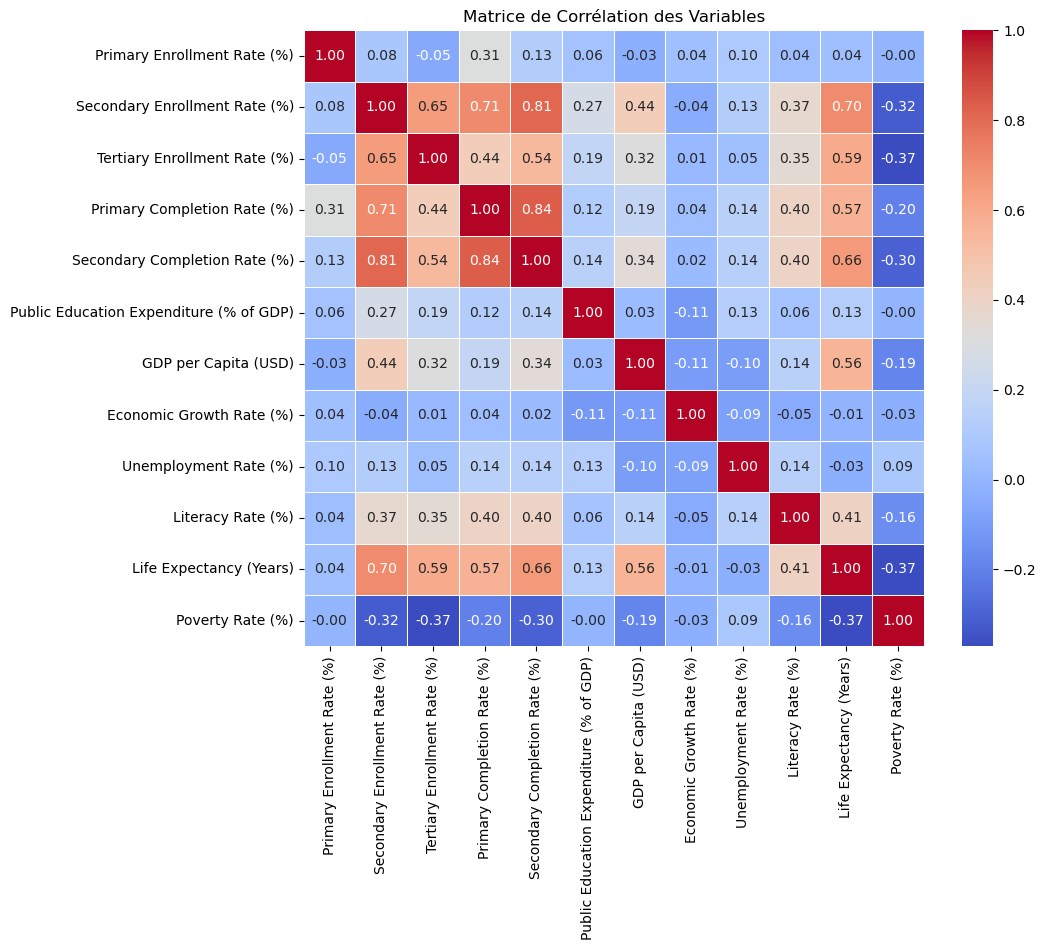

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données transformées
df = pd.read_csv("education_economics_indicators_transformed.csv")

# Filtrer uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=['number'])

# Calcul de la matrice de corrélation
correlation_matrix = df_numeric.corr()

# Affichage de la matrice de corrélation sous forme de carte thermique
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation des Variables')
plt.show()


Les taux d'inscription (Primary, Secondary, Tertiary) et de complétion scolaire sont fortement corrélés entre eux (corrélations > 0.7), indiquant une cohérence dans l'accès à l'éducation.
La dépense publique en éducation (% du PIB) est faiblement corrélée à la majorité des variables, suggérant une relation limitée avec les indicateurs éducatifs ou économiques.
Le taux d'alphabétisation et l'espérance de vie sont modérément liés au taux d'inscription tertiaire (corrélations ~0.6), soulignant leur rôle dans le développement humain.
Le taux de pauvreté a une corrélation négative avec plusieurs indicateurs éducatifs et économiques, indiquant un lien entre pauvreté et faible développement éducatif.

#### Régression multiple

Ce code effectue une analyse de régression multiple pour analyser l'effet des taux d'achèvement et d'inscription scolaire sur le PIB par habitant.

In [70]:
# Importer les bibliothèques
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Charger les données

data = pd.read_csv('education_economics_indicators_transformed.csv')

# Variables pour la régression multiple
X = data[["Secondary Completion Rate (%)", "Secondary Enrollment Rate (%)", "Tertiary Enrollment Rate (%)"]]
y = data["GDP per Capita (USD)"]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de régression multiple
lr = LinearRegression()
lr.fit(X_train, y_train)




LinearRegression()

Ce code visualise en 3D la relation entre le taux d'achèvement secondaire, le taux d'inscription secondaire et le PIB par habitant en représentant les données réelles sous forme de nuage de points et le plan de régression correspondant généré par le modèle de régression multiple.

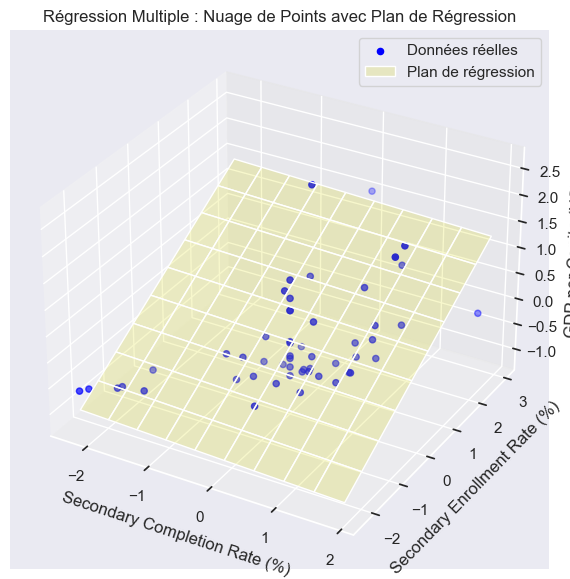

In [72]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Préparer les données pour le graphique 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Données réelles (nuage de points)
ax.scatter(
    X_test["Secondary Completion Rate (%)"],
    X_test["Secondary Enrollment Rate (%)"],
    y_test,
    color='blue',
    label='Données réelles'
)

# Créer un maillage pour le plan de régression
x1 = np.linspace(X_test["Secondary Completion Rate (%)"].min(), X_test["Secondary Completion Rate (%)"].max(), 10)
x2 = np.linspace(X_test["Secondary Enrollment Rate (%)"].min(), X_test["Secondary Enrollment Rate (%)"].max(), 10)
x1, x2 = np.meshgrid(x1, x2)
x1_flat, x2_flat = x1.ravel(), x2.ravel()

# Ajouter les prédictions du modèle sur le maillage
x3_pred = lr.intercept_ + lr.coef_[0] * x1_flat + lr.coef_[1] * x2_flat + lr.coef_[2] * np.mean(X_test["Tertiary Enrollment Rate (%)"])
x3_pred = x3_pred.reshape(x1.shape)

# Ajouter le plan de régression
ax.plot_surface(x1, x2, x3_pred, color='yellow', alpha=0.2, label='Plan de régression')

# Configurer les axes
ax.set_title("Régression Multiple : Nuage de Points avec Plan de Régression")
ax.set_xlabel("Secondary Completion Rate (%)")
ax.set_ylabel("Secondary Enrollment Rate (%)")
ax.set_zlabel("GDP per Capita (USD)")

# Ajouter une légende
plt.legend(["Données réelles", "Plan de régression"], loc="best")
plt.show()


#### Interprétation :
Nuage de points :

Les points bleus montrent comment les valeurs réelles de GDP per Capita se répartissent en fonction des deux variables explicatives (Secondary Completion Rate et Secondary Enrollment Rate).
Les données semblent dispersées, ce qui pourrait indiquer une faible corrélation entre ces deux variables explicatives et le PIB par habitant.

#### Plan de régression :

Le plan jaune représente le modèle de régression multiple ajusté aux données.
Il montre la relation linéaire prédite par le modèle entre les variables explicatives et la variable cible.
La faible proximité entre plusieurs points et le plan suggère que le modèle pourrait ne pas capturer parfaitement la variance du PIB par habitant.
#### conclusion 
Le modèle de régression multiple semble avoir des limites pour expliquer la variabilité du PIB par habitant uniquement à partir du taux d'achèvement et du taux d'inscription secondaire. 
Donc ces deux variables n ont pas d effet sur PIB .

In [74]:
# Prédictions et évaluation
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Régression multiple :")
print(f"R² (test) : {r2:.2f}")

Régression multiple :
R² (test) : 0.27


avec un coefficient de détermination 𝑅^2=0.27 , cela signifie que le modèle de régression multiple explique seulement 27 % de la variance du PIB par habitant
à partir des variables explicatives Secondary Enrollment Rate (%) et Secondary Completion Rate (%) 

#### le test de Kruskal-Wallis



Cette partie  présente une analyse statistique visant à examiner les différences de GDP per Capita (USD) entre plusieurs catégories d'Expenditure_Category. Le test de Kruskal-Wallis a été utilisé pour vérifier si des différences significatives existent entre les groupes. Ce test non paramétrique est adapté aux données qui ne suivent pas une distribution normale.

In [27]:
import pandas as pd

# Charger les données
data = pd.read_csv("education_economics_indicators_transformed.csv")

# Transformer la variable des dépenses publiques en éducation en catégories (quantiles)
data['Expenditure_Category'] = pd.qcut(
    data['Public Education Expenditure (% of GDP)'], 
    q=3,  # Diviser en 3 quantiles
    labels=['Low', 'Medium', 'High']  # Étiquettes des catégories
)

# Enregistrer les données modifiées dans un nouveau fichier CSV
output_file_path = "education_economics_indicators_transformed_with_categoriesj.csv"
data.to_csv(output_file_path, index=False)

print(f"Le fichier a été enregistré sous : {output_file_path}")


Le fichier a été enregistré sous : education_economics_indicators_transformed_with_categoriesj.csv


In [29]:
import pandas as pd
from scipy import stats
from scipy.stats import kruskal
import scikit_posthocs as sp
import seaborn as sns
import matplotlib.pyplot as plt



# Charger les données depuis un fichier CSV
# Remplacez 'votre_fichier.csv' par le chemin réel de votre fichier CSV
data = pd.read_csv('education_economics_indicators_transformed_with_categoriesj.csv')

# Afficher les premières lignes pour voir les données
# Sélectionner uniquement les colonnes numériques
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Appliquer le test de Shapiro-Wilk à chaque colonne numérique
for col in numerical_cols:
    # Effectuer le test de Shapiro-Wilk
    stat, p_value = stats.shapiro(data[col])
    print(f"Test de Shapiro-Wilk pour la colonne '{col}': Stat={stat}, p-value={p_value}")
    
    # Interpréter le résultat
    if p_value > 0.05:
        print(f"La colonne '{col}' suit une distribution normale.")
    else:
        print(f"La colonne '{col}' ne suit pas une distribution normale.")
    print("-" * 50)


Test de Shapiro-Wilk pour la colonne 'Primary Enrollment Rate (%)': Stat=0.8523964949610052, p-value=4.4946459133998474e-15
La colonne 'Primary Enrollment Rate (%)' ne suit pas une distribution normale.
--------------------------------------------------
Test de Shapiro-Wilk pour la colonne 'Secondary Enrollment Rate (%)': Stat=0.9247940761696637, p-value=3.1920703794703525e-10
La colonne 'Secondary Enrollment Rate (%)' ne suit pas une distribution normale.
--------------------------------------------------
Test de Shapiro-Wilk pour la colonne 'Tertiary Enrollment Rate (%)': Stat=0.9454085363013278, p-value=2.7594022564774513e-08
La colonne 'Tertiary Enrollment Rate (%)' ne suit pas une distribution normale.
--------------------------------------------------
Test de Shapiro-Wilk pour la colonne 'Primary Completion Rate (%)': Stat=0.8556665922751474, p-value=6.773651045492056e-15
La colonne 'Primary Completion Rate (%)' ne suit pas une distribution normale.
------------------------------

In [31]:
data = pd.read_csv('education_economics_indicators_transformed_with_categoriesj.csv')
data.head()

,Country Name,Country ISO Code,Primary Enrollment Rate (%),Secondary Enrollment Rate (%),Tertiary Enrollment Rate (%),Primary Completion Rate (%),Secondary Completion Rate (%),Public Education Expenditure (% of GDP),GDP per Capita (USD),Economic Growth Rate (%),Unemployment Rate (%),Literacy Rate (%),Life Expectancy (Years),Poverty Rate (%),Expenditure_Category
0,Arab World,ARB,-1.114646,-0.727716,-0.544085,-0.826542,-0.754123,1.215476e-15,-0.441295,-0.466670,0.739246,-0.816148,-0.123942,0.000000,Medium
1,World,WLD,0.077583,-0.436792,-0.259243,-0.126460,-0.198609,-6.056073e-02,-0.245802,0.033656,-0.325281,0.567351,0.035039,1.168492,Medium
2,East Asia & Pacific (excluding high income),EAP,-0.072907,0.006715,0.020185,0.582842,0.551908,-5.688887e-01,-0.394654,0.885542,-0.730149,1.655968,0.424914,0.000000,Low
3,Europe & Central Asia (excluding high income),ECA,-0.436667,0.681330,0.982530,0.411355,0.832842,-1.754877e-01,-0.436893,0.654203,0.264108,2.008644,0.223978,0.000000,Medium
4,South Asia,SAS,0.879998,-0.762287,-0.865859,0.117390,-0.045359,-8.295493e-01,-0.612143,0.831068,-0.116051,-1.110357,-0.307205,1.859622,Low


Hypothèses du test de Kruskal-Wallis

- Hypothèse nulle (H₀) : Les médianes des groupes sont égales. Autrement dit, il n'y a pas de différence significative entre les groupes.
- 
- Hypothèse alternative (H₁) : Au moins une des médianes est différente des autres. Cela signifie qu'il existe une différence significative entre les groupes.

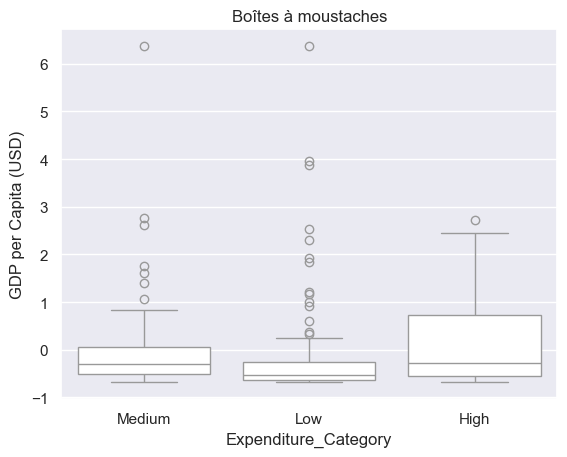

In [34]:
sns.set()
ax = sns.boxplot(x="Expenditure_Category", y="GDP per Capita (USD)", data=data, color='white')

plt.xlabel('Expenditure_Category')
plt.ylabel('GDP per Capita (USD)')
plt.title('Boîtes à moustaches')
plt.show()


Cette boîte à moustaches montre la répartition du PIB par habitant (en USD) en fonction de trois catégories de dépenses : Medium, Low, et High. 

1-Central Tendency (Médianes) :

Les médianes diffèrent selon les catégories de dépenses. Le PIB par habitant semble plus élevé pour la catégorie High que pour les catégories Medium et Low, suggérant une association entre des niveaux de dépenses élevés et des PIB par habitant plus élevés.  

2-Dispersion :

La catégorie High présente une plus grande dispersion (écart entre les quartiles et longueurs des moustaches) par rapport aux autres catégories, indiquant une variabilité plus élevée du PIB par habitant dans ce groupe.
Les catégories Medium et Low ont des intervalles interquartiles plus serrés, ce qui montre une répartition plus concentrée autour de la médiane.
3-Présence d'outliers :

Des points au-dessus des moustaches sont visibles dans toutes les catégories, particulièrement dans les catégories Medium et High, indiquant des valeurs extrêmes dans ces groupes.
4-Tendance globale :

La catégorie High montre globalement des valeurs de PIB par habitant plus élevées, ce qui pourrait indiquer une corrélation positive entre une forte catégorie de dépenses et le niveau de PIB par habitant.

In [37]:


# Charger les données depuis un fichier CSV
# Remplacez 'votre_fichier.csv' par le chemin réel de votre fichier CSV
data = pd.read_csv('education_economics_indicators_transformed_with_categoriesj.csv')

# Extraire les groupes en fonction de la catégorie d'Expenditure_Category
groups = [data[data["Expenditure_Category"] == category]["GDP per Capita (USD)"] for category in data["Expenditure_Category"].unique()]

# Effectuer le test de Kruskal-Wallis
stat, p_value = stats.kruskal(*groups)

# Afficher les résultats
print(f"Test de Kruskal-Wallis: Stat={stat}, p-value={p_value}")

# Interpréter le résultat
if p_value < 0.05:
    print("Il y a une différence significative entre les groupes .")
else:
    print("Il n'y a pas de différence significative entre les groupes).")


Test de Kruskal-Wallis: Stat=17.50823785626023, p-value=0.00015780997665581833
Il y a une différence significative entre les groupes .


Le test de Kruskal-Wallis que nous avons effectué a révélé une différence significative entre les groupes de la variable "Expenditure_Category" en ce qui concerne "GDP per Capita (USD)". La statistique de test de Kruskal-Wallis est de 17.51, et la p-value associée est 0.00016, ce qui est bien inférieur au seuil de significativité de 0.05. Cela indique qu'il existe une différence importante dans la distribution du GDP per Capita (USD) entre les différentes catégories d'Expenditure_Category. En d'autres termes, les groupes définis par Expenditure_Category n'ont pas des distributions similaires de GDP per Capita (USD), ce qui suggère que le GDP per Capita varie de manière significative en fonction de l'expenditure category

In [45]:


# Charger les données depuis un fichier CSV
# Remplacez 'votre_fichier.csv' par le chemin réel de votre fichier CSV
data = pd.read_csv('education_economics_indicators_transformed_with_categoriesj.csv')

# Extraire les groupes en fonction de la catégorie d'Expenditure_Category
groups = [data[data["Expenditure_Category"] == category]["GDP per Capita (USD)"] for category in data["Expenditure_Category"].unique()]

# Effectuer le test de Kruskal-Wallis
stat, p_value = stats.kruskal(*groups)

# Afficher les résultats du test de Kruskal-Wallis
print(f"Test de Kruskal-Wallis: Stat={stat}, p-value={p_value}")

# Interpréter le résultat
if p_value < 0.05:
    print("Il y a une différence significative entre les groupes.")
    
    # Effectuer le test post-hoc de Dunn
    posthoc = sp.posthoc_dunn(data, val_col='GDP per Capita (USD)', group_col='Expenditure_Category', p_adjust='bonferroni')
    
    # Afficher les résultats du test de Dunn
    print("\nRésultats du test de Dunn (comparaisons entre les groupes) :")
    print(posthoc)
    
else:
    print("Il n'y a pas de différence significative entre les groupes.")


Test de Kruskal-Wallis: Stat=17.50823785626023, p-value=0.00015780997665581833
Il y a une différence significative entre les groupes.

Résultats du test de Dunn (comparaisons entre les groupes) :
            High       Low    Medium
High    1.000000  0.000976  1.000000
Low     0.000976  1.000000  0.000844
Medium  1.000000  0.000844  1.000000


Interprétation des résultats :

High vs Low : La p-value est 0.000976, ce qui est inférieur à 0.05, indiquant une différence significative entre les groupes High et Low.

High vs Medium : La p-value est 1.000, ce qui est supérieur à 0.05, ce qui signifie qu'il n'y a pas de différence significative entre les groupes High et Medium.
    
Low vs Medium : La p-value est 0.000844, ce qui est inférieur à 0.05, indiquant une différence significative entre les groupes Low et Medium.

Cela suggère que, bien qu'il y ait des différences globales entre les groupes (selon le test de Kruskal-Wallis), la comparaison post-hoc montre que High et Medium ne diffèrent pas de manière significative, tandis que High diffère de Low et Low diffère de Medium.

# ACP

Valeurs propres : [4.35 1.4  1.19 0.95 0.92 0.81 0.73 0.64 0.47 0.27 0.19 0.12]
Vecteurs propres :
 [[-0.07 -0.43 -0.36 -0.39 -0.42 -0.11 -0.25  0.01 -0.06 -0.26 -0.41  0.21]
 [ 0.45  0.03 -0.14  0.26  0.11  0.28 -0.37 -0.08  0.57  0.12 -0.19  0.32]
 [ 0.39 -0.06 -0.09  0.24  0.11 -0.44 -0.2   0.69 -0.21 -0.03 -0.02 -0.12]
 [-0.62 -0.02  0.22 -0.06  0.02 -0.11 -0.4   0.32  0.37  0.37 -0.08 -0.1 ]
 [-0.01  0.08  0.18 -0.08 -0.04  0.75 -0.19  0.39 -0.17 -0.36 -0.05 -0.19]
 [-0.26  0.11 -0.05  0.06  0.1   0.04  0.33  0.38 -0.01 -0.11  0.1   0.79]
 [-0.03  0.09  0.03 -0.08  0.05 -0.24  0.26  0.1   0.62 -0.63 -0.   -0.25]
 [ 0.3  -0.18  0.01 -0.36 -0.34  0.17  0.45  0.32  0.26  0.45  0.14 -0.1 ]
 [ 0.26  0.01  0.83 -0.16 -0.23 -0.21 -0.15 -0.09 -0.04 -0.11 -0.02  0.28]
 [ 0.01  0.19  0.14  0.03  0.17  0.    0.35  0.04 -0.08  0.15 -0.87 -0.08]
 [ 0.1   0.8  -0.23 -0.48 -0.1  -0.12 -0.2   0.02 -0.04  0.06  0.03  0.04]
 [ 0.12 -0.27  0.04 -0.57  0.76  0.01 -0.07 -0.02 -0.02  0.01  0.05  0.05]]

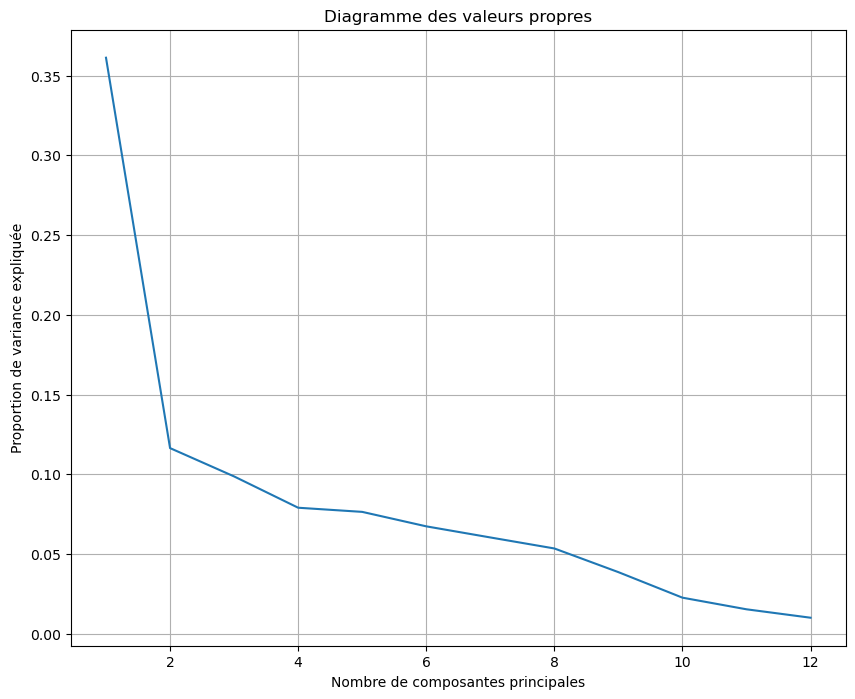

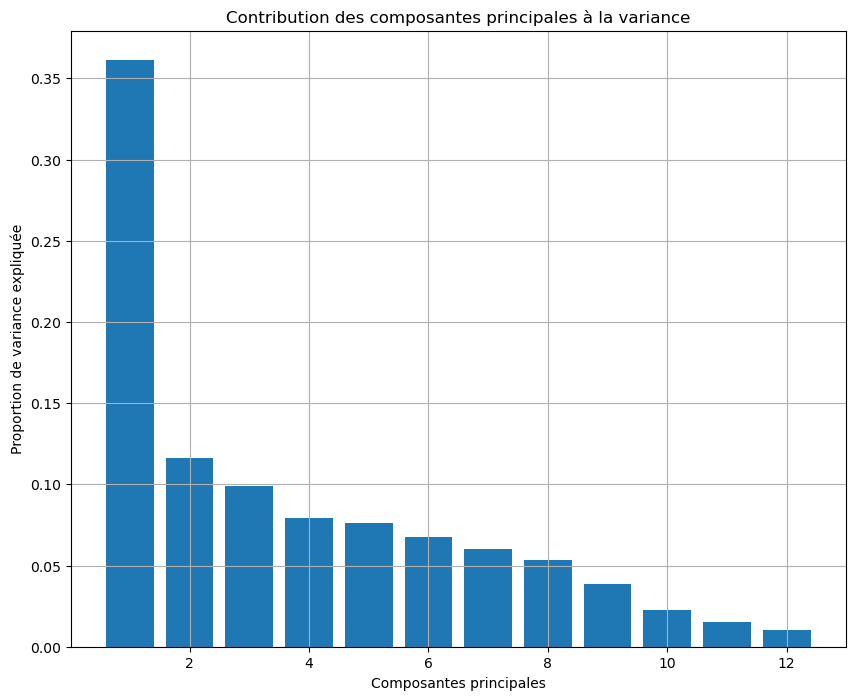

In [10]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Charger les données transformées
df_transformed = pd.read_csv("education_economics_indicators_transformed.csv")

# Filtrer uniquement les colonnes numériques
df_numeric = df_transformed.select_dtypes(include=['float64', 'int64'])

# Appliquer l'ACP
pca = PCA(n_components=len(df_numeric.columns))
pca.fit(df_numeric)

# Extraire les valeurs propres (explained_variance_) et les vecteurs propres (components_)
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Arrondir les valeurs propres et les vecteurs propres
eigenvalues_rounded = np.round(eigenvalues, 2)
eigenvectors_rounded = np.round(eigenvectors, 2)

# Afficher les résultats
print("Valeurs propres :", eigenvalues_rounded)
print("Vecteurs propres :\n", eigenvectors_rounded)

# Tracer le diagramme des valeurs propres (proportion de variance expliquée)
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Proportion de variance expliquée')
plt.title('Diagramme des valeurs propres')
plt.grid()
plt.show()

# Tracer la contribution de chaque composante principale aux variances
plt.figure(figsize=(10, 8))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Composantes principales')
plt.ylabel('Proportion de variance expliquée')
plt.title('Contribution des composantes principales à la variance')
plt.grid(True)
plt.show()


Ce diagramme des valeurs propres, également appelé scree plot, illustre la proportion de variance expliquée par chaque composante principale dans le cadre d’une analyse en composantes principales (ACP). La première composante principale capture une proportion significative de la variance (~35 %), ce qui montre qu’elle contient l’essentiel de l’information des données. Une diminution rapide des valeurs propres est visible après les premières composantes (effet "coude"), indiquant que les 2 ou 3 premières composantes suffisent à représenter efficacement les données. Au-delà de la quatrième composante, la variance expliquée devient négligeable, ce qui suggère que ces composantes contiennent peu d’informations pertinentes. Ainsi, cette analyse permet de réduire la dimensionnalité tout en conservant une bonne partie de la structure des données

#### Cercle de corrélation

Le graphique montre un cercle de corrélation en 3D, qui est une représentation des relations entre les variables originales et les trois composantes principales

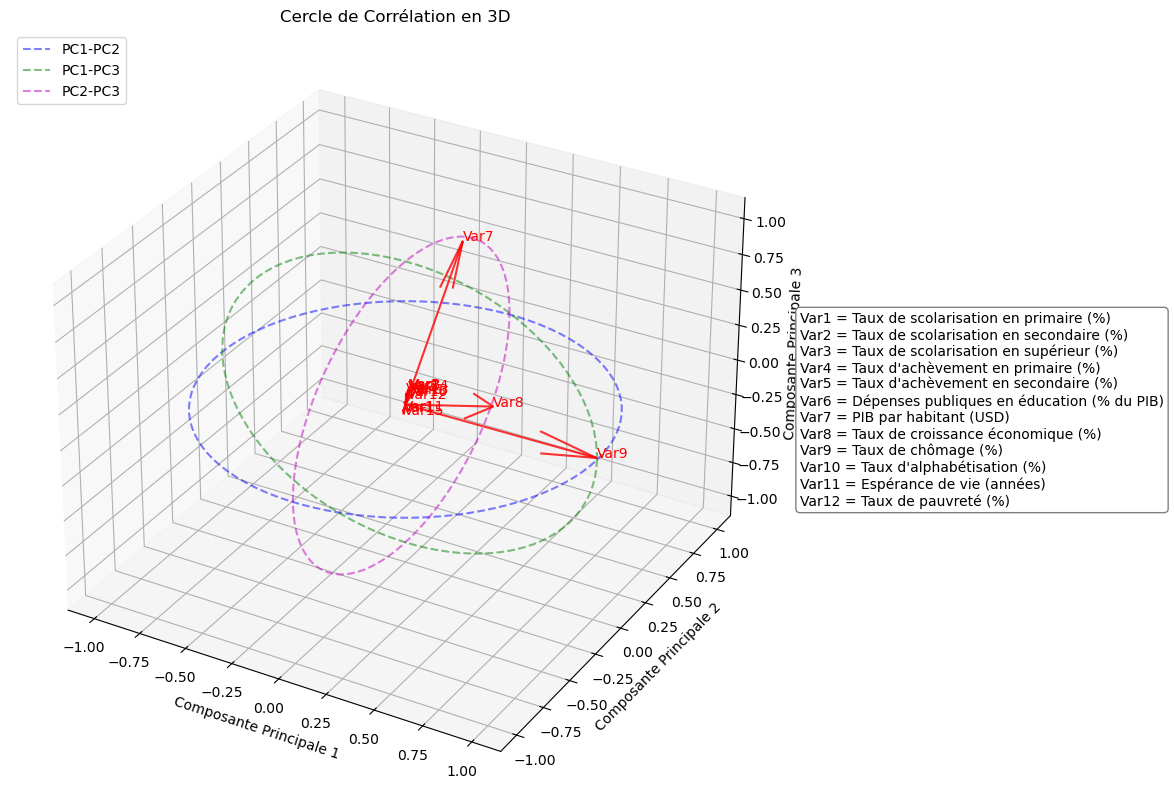

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Charger les données transformées
df_transformed = pd.read_csv("education_economics_indicators_transformed.csv")

# Sélectionner les colonnes numériques pour l'ACP
df_numeric = df_transformed.select_dtypes(include=['float64', 'int64'])

# Appliquer l'ACP
pca = PCA(n_components=3)  # Limité à 3 composantes principales pour la visualisation 3D
pca.fit(df_numeric)

# Extraire les composantes principales
components = pca.components_

# Noms des variables
variable_names = [
    'Taux de scolarisation en primaire (%)', 
    'Taux de scolarisation en secondaire (%)',
    'Taux de scolarisation en supérieur (%)', 
    'Taux d\'achèvement en primaire (%)',
    'Taux d\'achèvement en secondaire (%)', 
    'Dépenses publiques en éducation (% du PIB)',
    'PIB par habitant (USD)', 
    'Taux de croissance économique (%)', 
    'Taux de chômage (%)',
    'Taux d\'alphabétisation (%)', 
    'Espérance de vie (années)', 
    'Taux de pauvreté (%)'
]

# Création de la figure 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Tracer les flèches pour les variables
for i, (x, y, z) in enumerate(components.T):
    ax.quiver(0, 0, 0, x, y, z, color='r', alpha=0.8)
    ax.text(x, y, z, f"Var{i+1}", color='r')

# Tracer les cercles projetés sur les plans PC1-PC2, PC1-PC3, et PC2-PC3
theta = np.linspace(0, 2 * np.pi, 100)
circle_xy = np.array([np.cos(theta), np.sin(theta), np.zeros_like(theta)])  # Plan PC1-PC2
circle_xz = np.array([np.cos(theta), np.zeros_like(theta), np.sin(theta)])  # Plan PC1-PC3
circle_yz = np.array([np.zeros_like(theta), np.cos(theta), np.sin(theta)])  # Plan PC2-PC3

# Ajouter les cercles au graphique
ax.plot(circle_xy[0], circle_xy[1], circle_xy[2], 'b--', alpha=0.5, label='PC1-PC2')
ax.plot(circle_xz[0], circle_xz[1], circle_xz[2], 'g--', alpha=0.5, label='PC1-PC3')
ax.plot(circle_yz[0], circle_yz[1], circle_yz[2], 'm--', alpha=0.5, label='PC2-PC3')

# Ajuster les limites
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])
ax.set_zlim([-1.1, 1.1])

# Ajouter des labels et un titre
ax.set_xlabel('Composante Principale 1')
ax.set_ylabel('Composante Principale 2')
ax.set_zlabel('Composante Principale 3')
ax.set_title('Cercle de Corrélation en 3D')

# Créer une légende descriptive à droite
legend_labels = [f"Var{i+1} = {name}" for i, name in enumerate(variable_names)]
legend_text = "\n".join(legend_labels)

# Ajouter un texte hors du graphique pour la légende descriptive
plt.figtext(0.85, 0.5, legend_text, fontsize=10, color='black', ha='left', va='center', bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))

# Afficher la légende des cercles
ax.legend(loc='upper left')

plt.show()


Ce graphique, tiré d'une Analyse en Composantes Principales (ACP), révèle que les variables Var7 (PIB par habitant) et Var9 (Taux de chômage) sont indépendantes, comme le montre l'orientation presque orthogonale de leurs vecteurs. En revanche, Var8 (Taux de croissance économique) et Var7 sont positivement corrélées, témoignant d’une relation directe entre ces deux indicateurs. Les autres variables, principalement liées à l’éducation et aux dépenses publiques (Var1 à Var6), sont regroupées près de l'origine, suggérant une contribution similaire et faible aux composantes principales. Cela indique une interdépendance étroite entre ces facteurs, mais un impact moindre sur la structuration globale des données

#### Régression polynomiale

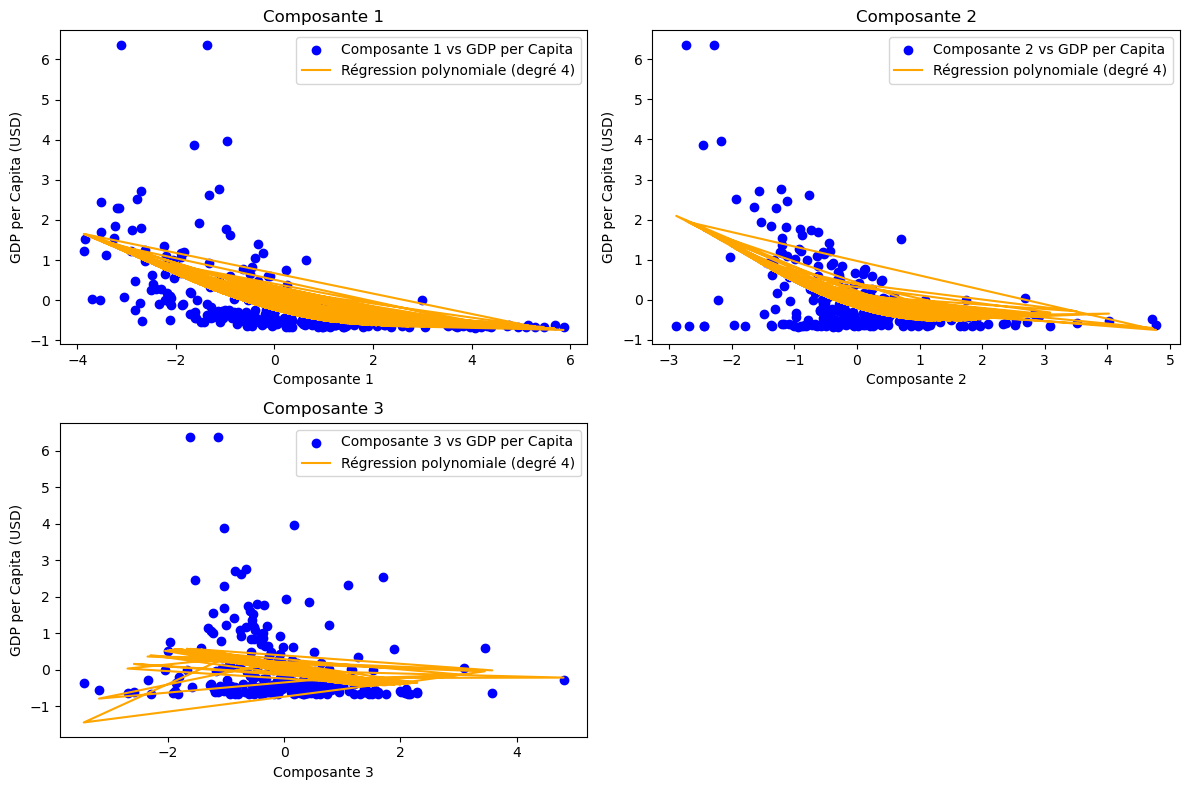

Évaluation du modèle pour chaque composante :
Composante 1: MSE = 0.66, R² = 0.34
Composante 2: MSE = 0.73, R² = 0.27
Composante 3: MSE = 0.90, R² = 0.10


In [230]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Nombre de composantes principales à visualiser (3 dans cet exemple)
num_components = 3

# Stockage des métriques pour analyse
mse_values = []  # Erreur quadratique moyenne
r2_values = []   # Coefficient de détermination

# Création des graphiques
plt.figure(figsize=(12, 8))
for i in range(num_components):
    # Sélection de la composante principale (i+1)
    X_component = X_pca[:, i].reshape(-1, 1)  # Composante i+1
    
    # Transformation polynomiale (degré 4)
    poly = PolynomialFeatures(degree=4)
    X_poly = poly.fit_transform(X_component)
    
    # Régression polynomiale
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, gdp_per_capita)
    
    # Prédictions
    gdp_poly_pred = poly_reg.predict(X_poly)
    
    # Évaluation du modèle
    mse = mean_squared_error(gdp_per_capita, gdp_poly_pred)
    r2 = r2_score(gdp_per_capita, gdp_poly_pred)
    mse_values.append(mse)
    r2_values.append(r2)
    
    # Tracé
    plt.subplot(2, 2, i + 1)  # Organise les graphiques en une grille 2x2
    plt.scatter(X_component, gdp_per_capita, color='blue', label=f'Composante {i+1} vs GDP per Capita')
    plt.plot(X_component, gdp_poly_pred, color='orange', label='Régression polynomiale (degré 4)')
    plt.title(f'Composante {i+1}')
    plt.xlabel(f'Composante {i+1}')
    plt.ylabel('GDP per Capita (USD)')
    plt.legend()

# Ajuste l'espacement entre les graphiques
plt.tight_layout()
plt.show()

# Affichage des métriques globales
print("Évaluation du modèle pour chaque composante :")
for i in range(num_components):
    print(f"Composante {i+1}: MSE = {mse_values[i]:.2f}, R² = {r2_values[i]:.2f}")


#### Intérprétation 
Composante 1 :

Relation modérée avec le PIB (𝑅^2=0.34).
Le modèle capture une tendance décroissante, mais les oscillations indiquent un ajustement parfois excessif.
MSE raisonnable (0.66), montrant un bon ajustement global.

Composante 2 :

Relation faible avec le PIB (𝑅2=0.27).
La courbe montre une tendance décroissante, mais les données sont plus dispersées, réduisant la précision.
MSE légèrement plus élevé (0.73).

Composante 3 :

Aucune relation significative avec le PIB (𝑅2=0.10).
La courbe oscille fortement et ne suit pas une tendance claire.
MSE élevé (0.90), confirmant un mauvais ajustement.
    
Conclusion :
La Composante 1 est la plus importante pour expliquer la variabilité du PIB par habitant.
La Composante 2 a un rôle secondaire.
La Composante 3 n'a pratiquement aucune influence sur le PIB, et le modèle polynomiale est inutile pour cette relation.